## Generate demand microtype validation
### Author: Xiaodan Xu, LBNL

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import contextily as cx

import warnings
warnings.filterwarnings("ignore")
os.chdir('/Users/xiaodanxu/Library/CloudStorage/GoogleDrive-arielinseu@gmail.com/My Drive/GEMS/typology/V2')

In [2]:
example_map = gpd.read_file('Output/CA_clustering_outputs.geojson')
cluster_results = read_csv('Output/clustering_outputs_with_raw_data.csv')
census_tract_crosswalk = read_csv('Output/census_tract_crosswalk_2010_2020.csv')
v1_cluster = read_csv('Output/ccst_geoid_key_transp_geo_with_imputation.csv')
print(cluster_results.columns)
cluster_results.head(5)

Index(['GEOID', 'ALAND', 'pct_water', 'land_area_acre', 'populationE',
       'householdsE', 'pop_per_acre', 'total_jobs', 'jobs_per_acre',
       'jobs_resident_bal', 'job_diversity', 'jobs_dist_bin1',
       'jobs_dist_bin2', 'jobs_dist_bin3', 'jobs_dist_bin4', 'remote jobs',
       'job_sink_mag', 'impervious_developed', 'developed_open_space',
       'census_urban_area', 'tract', 'demand_microtype_comb'],
      dtype='object')


,GEOID,ALAND,pct_water,land_area_acre,populationE,householdsE,pop_per_acre,total_jobs,jobs_per_acre,jobs_resident_bal,...,jobs_dist_bin2,jobs_dist_bin3,jobs_dist_bin4,remote jobs,job_sink_mag,impervious_developed,developed_open_space,census_urban_area,tract,demand_microtype_comb
0,1045020801,19261326,0.000000,4759.569961,3317,1213,0.696912,57,0.011976,0.017184,...,0.052632,0.298246,0.473684,0.017544,0.051259,0.144737,0.105263,1,1045020801,Urban_industrial
1,1017954200,62998696,0.000550,15567.292775,3800,1280,0.244102,368,0.023639,0.096842,...,0.070652,0.366848,0.532609,0.029891,0.245497,0.021661,0.054152,1,1017954200,Urban_industrial
2,1017953800,515692207,0.021845,127430.122811,3715,1512,0.029153,95,0.000746,0.025572,...,0.000000,0.315789,0.684211,0.000000,0.073586,0.008019,0.032547,0,1017953800,Rural_agriculture
3,1017954300,132642536,0.001342,32776.633858,5275,2081,0.160938,3085,0.094122,0.584834,...,0.091410,0.254133,0.612966,0.041491,1.457940,0.063830,0.048356,1,1017954300,Suburban
4,1017954700,38036820,0.006903,9399.088406,4586,1706,0.487920,1345,0.143099,0.293284,...,0.000000,0.237918,0.614126,0.076580,0.680668,0.073620,0.061350,1,1017954700,Suburban


In [11]:
# count of clusters
cluster_result_count = cluster_results.groupby('demand_microtype_comb').size()
cluster_result_count

demand_microtype_comb
Rural_agriculture     7220
Rural_towncenter      4949
Suburban             21675
Urban_center         22510
Urban_industrial     27741
dtype: int64

In [3]:
cluster_results = cluster_results.set_index('GEOID')
list_of_var = ['pop_per_acre', 'jobs_per_acre',
       'jobs_resident_bal', 'job_diversity', 'jobs_dist_bin1',
       'jobs_dist_bin2', 'jobs_dist_bin3', 'jobs_dist_bin4', 'remote jobs',
       'job_sink_mag', 'impervious_developed', 'developed_open_space',
       'census_urban_area', 'demand_microtype_comb']
cluster_results_to_plot = cluster_results[list_of_var]
cluster_results_to_plot.head(5)

,pop_per_acre,jobs_per_acre,jobs_resident_bal,job_diversity,jobs_dist_bin1,jobs_dist_bin2,jobs_dist_bin3,jobs_dist_bin4,remote jobs,job_sink_mag,impervious_developed,developed_open_space,census_urban_area,demand_microtype_comb
GEOID,,,,,,,,,,,,,,
1045020801,0.696912,0.011976,0.017184,0.609488,0.157895,0.052632,0.298246,0.473684,0.017544,0.051259,0.144737,0.105263,1,Urban_industrial
1017954200,0.244102,0.023639,0.096842,0.514647,0.000000,0.070652,0.366848,0.532609,0.029891,0.245497,0.021661,0.054152,1,Urban_industrial
1017953800,0.029153,0.000746,0.025572,0.534946,0.000000,0.000000,0.315789,0.684211,0.000000,0.073586,0.008019,0.032547,0,Rural_agriculture
1017954300,0.160938,0.094122,0.584834,0.630540,0.000000,0.091410,0.254133,0.612966,0.041491,1.457940,0.063830,0.048356,1,Suburban
1017954700,0.487920,0.143099,0.293284,0.801565,0.071375,0.000000,0.237918,0.614126,0.076580,0.680668,0.073620,0.061350,1,Suburban


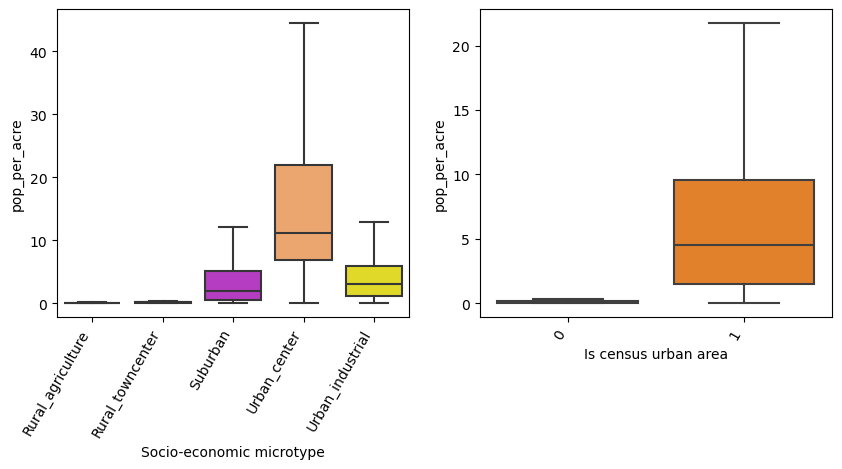

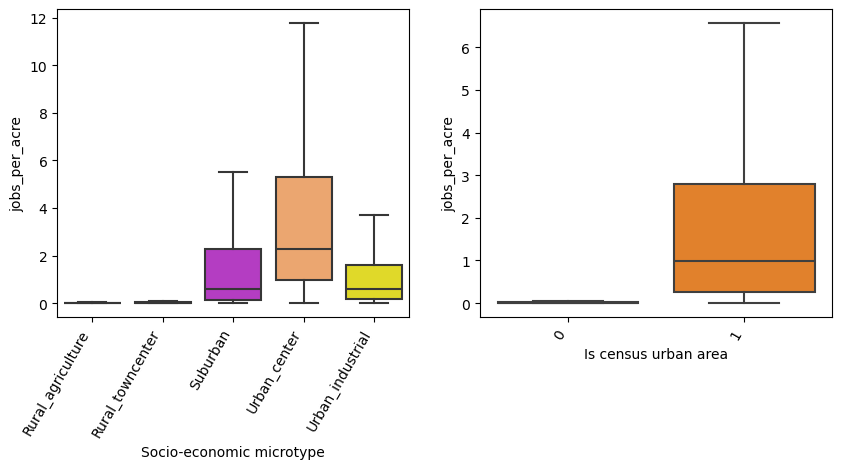

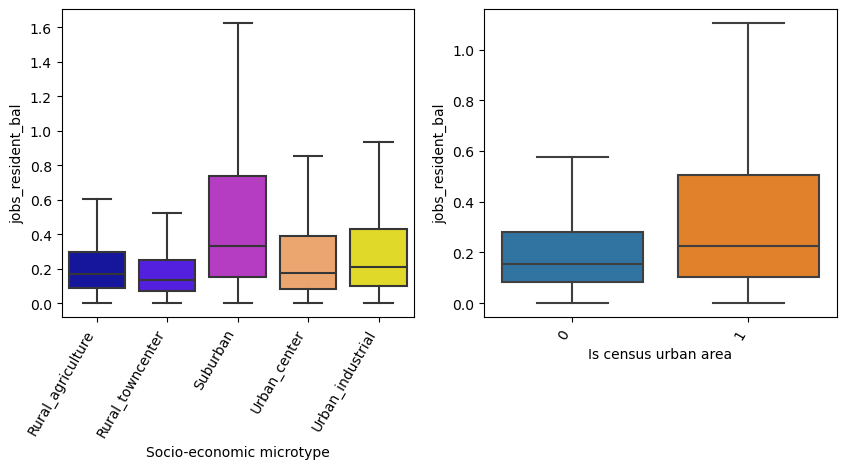

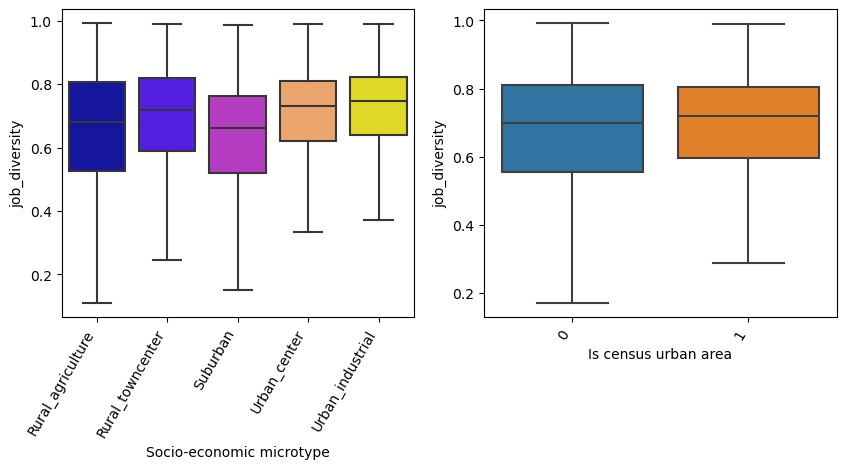

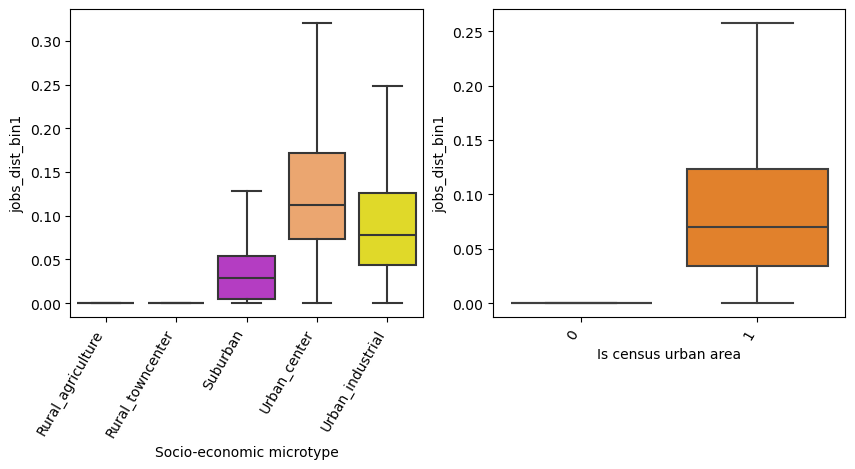

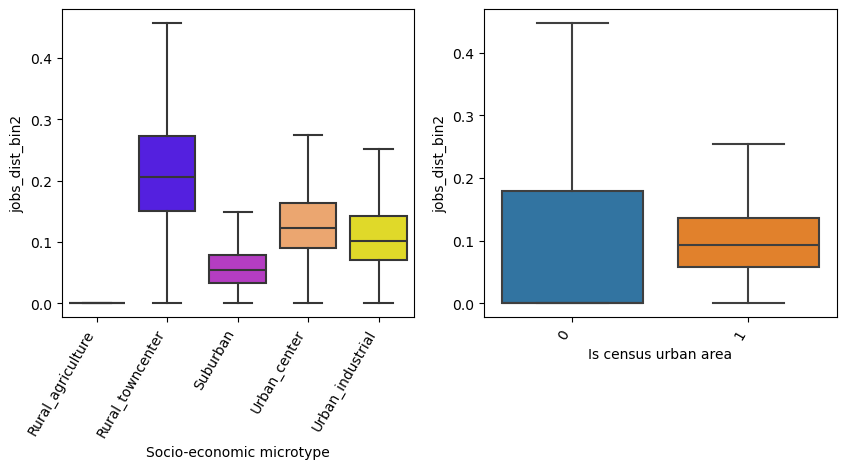

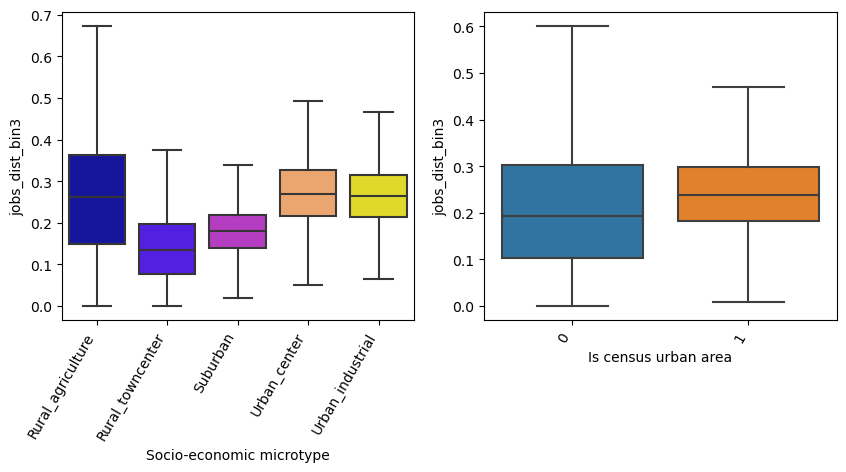

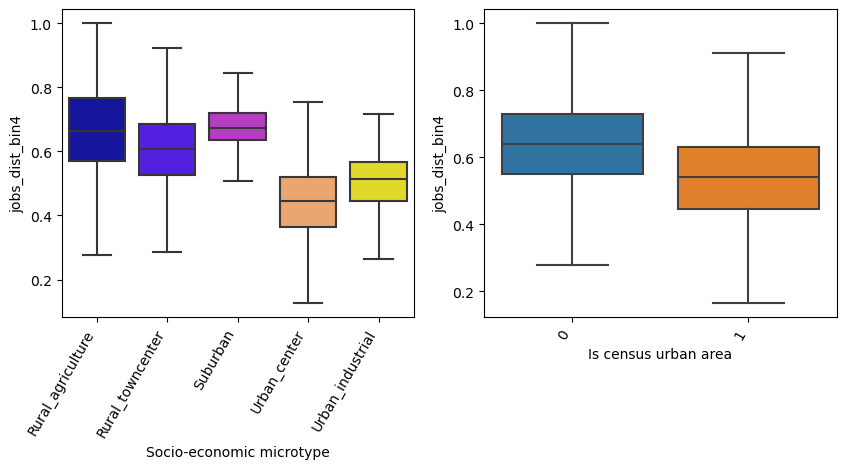

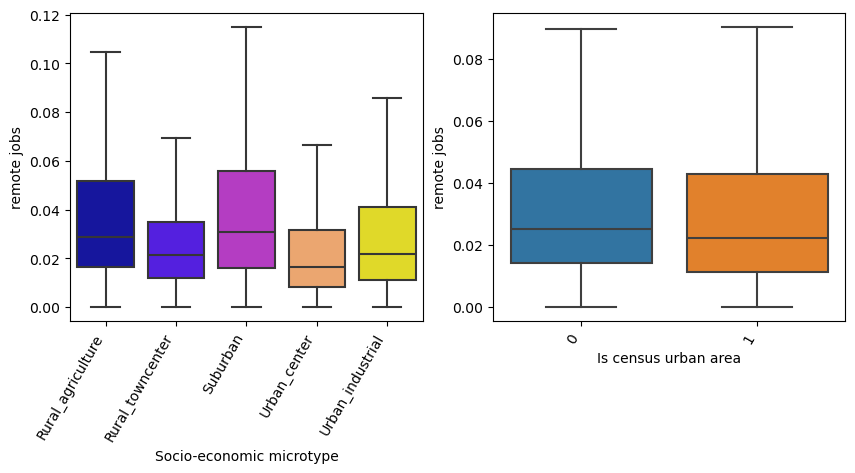

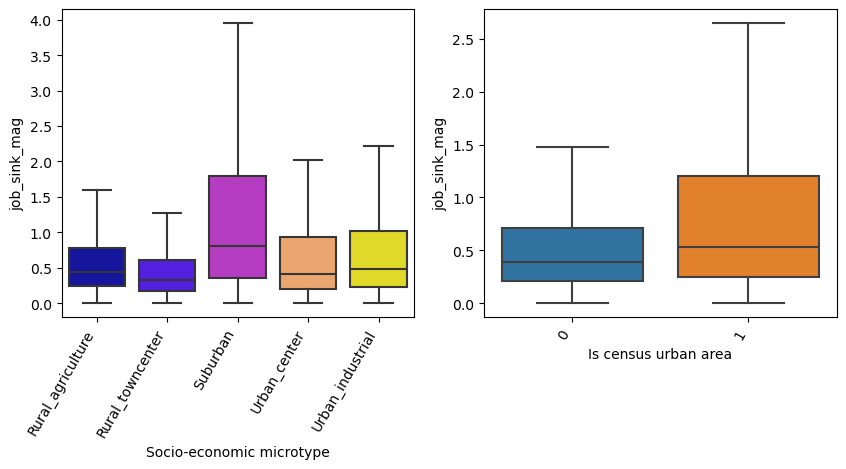

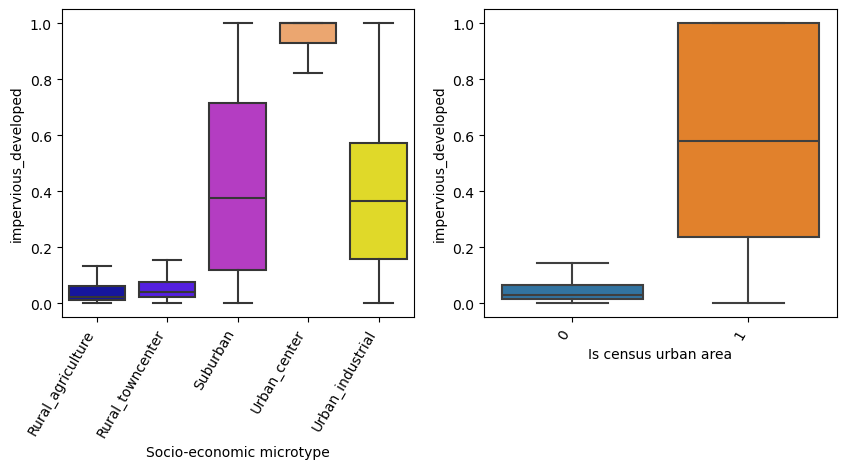

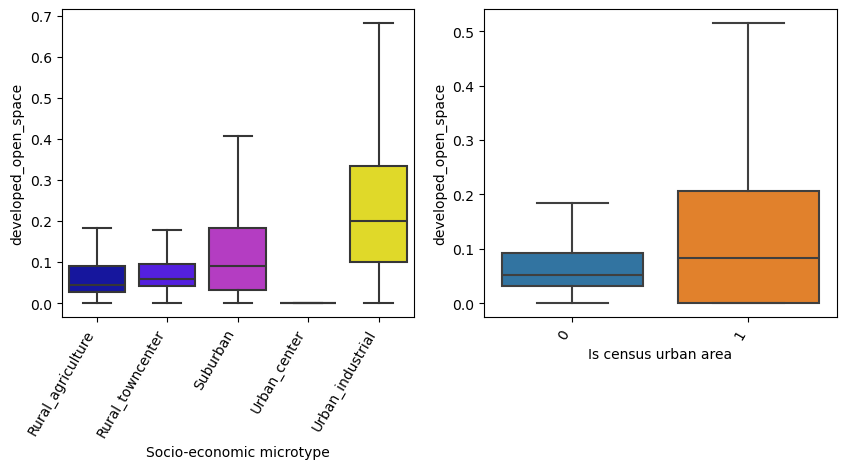

In [4]:
list_of_feature = ['pop_per_acre', 'jobs_per_acre',
       'jobs_resident_bal', 'job_diversity', 'jobs_dist_bin1',
       'jobs_dist_bin2', 'jobs_dist_bin3', 'jobs_dist_bin4', 'remote jobs',
       'job_sink_mag', 'impervious_developed', 'developed_open_space']
palette = ["#0000B3FF", "#4500FFFF", "#C527D8FF", "#FFA35CFF", "#FFF50AFF"]
cluster_results_to_plot = cluster_results_to_plot.sort_values(by = 'demand_microtype_comb')
for feature in list_of_feature:
    plt.figure(figsize = (10, 4))
    plt.subplot(121)
    sns.boxplot(data = cluster_results_to_plot, x = "demand_microtype_comb", 
                y = feature, 
                palette=sns.color_palette(palette, 5),
                showfliers=False)
    plt.xticks(rotation = 60, ha = 'right')
    plt.xlabel('Socio-economic microtype')

    plt.subplot(122)
    sns.boxplot(data = cluster_results_to_plot, x = "census_urban_area", 
                y = feature, showfliers=False)
    plt.xlabel('Is census urban area')
    plt.xticks(rotation = 60, ha = 'right')
    plt.savefig('Plot/box_plot_for_' + feature + '.png', dpi = 300,
               bbox_inches = 'tight')
    plt.show()
    # break

In [19]:
example_map.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,demand_microtype_comb,pop_per_acre,jobs_per_acre,geometry
0,06,037,294610,1400000US06037294610,06037294610,2946.10,Census Tract 2946.10,CA,Los Angeles County,California,CT,823808.0,0.0,Urban_center,21.781518,2.878658,"MULTIPOLYGON (((-118.26331 33.79115, -118.2552..."
1,06,059,011402,1400000US06059011402,06059011402,114.02,Census Tract 114.02,CA,Orange County,California,CT,1136419.0,0.0,Urban_industrial,11.388288,0.957927,"MULTIPOLYGON (((-117.91371 33.88611, -117.9101..."
2,06,019,001304,1400000US06019001304,06019001304,13.04,Census Tract 13.04,CA,Fresno County,California,CT,1307803.0,0.0,Urban_industrial,17.226512,1.172777,"MULTIPOLYGON (((-119.75463 36.72861, -119.7512..."
3,06,037,273700,1400000US06037273700,06037273700,2737,Census Tract 2737,CA,Los Angeles County,California,CT,690352.0,0.0,Urban_center,17.199190,2.098606,"MULTIPOLYGON (((-118.45920 33.99717, -118.4562..."
4,06,037,207501,1400000US06037207501,06037207501,2075.01,Census Tract 2075.01,CA,Los Angeles County,California,CT,134327.0,0.0,Urban_center,60.916691,25.035495,"MULTIPOLYGON (((-118.25590 34.05609, -118.2533..."


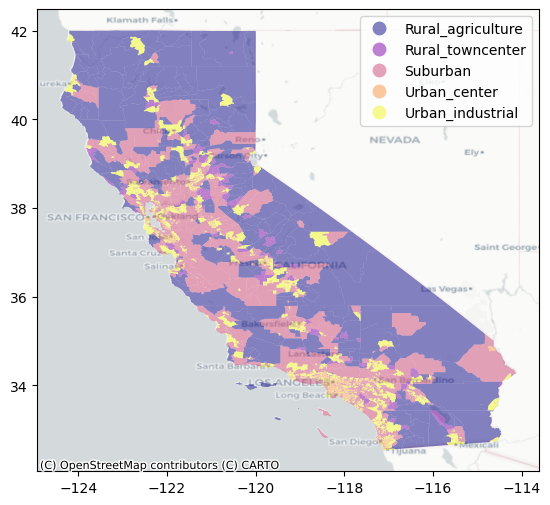

In [18]:
# plot CA example
from matplotlib import cm

# colors = {'Rural_agriculture': "#0000B3FF", 
#           'Rural_towncenter': "#4500FFFF", 
#           'Suburban': "#FFA35CFF", 
#           'Urban_center': "#FFF50AFF", 
#          'Urban_industrial': "#C527D8FF"}

# # Create a custom colormap
# cmap = plt.cm.LinearSegmentedColormap('my_colormap', colors)

ax = example_map.plot(figsize = (8,6), column = 'demand_microtype_comb', 
                            alpha = 0.5, legend=True,
                            # norm=matplotlib.colors.LogNorm(vmin=region_map_with_production.production_per_area.min(), 
                            #                                vmax=region_map_with_production.production_per_area.max()),
                            cmap= 'plasma',
                            linewidth=0.01)
cx.add_basemap(ax, crs = 'EPSG:4269',source = cx.providers.CartoDB.Positron)
plt.savefig('Plot/CA_demand_microtype.png', dpi = 300, bbox_inches = 'tight')
                            # legend_kwds = {'shrink': 0.9})

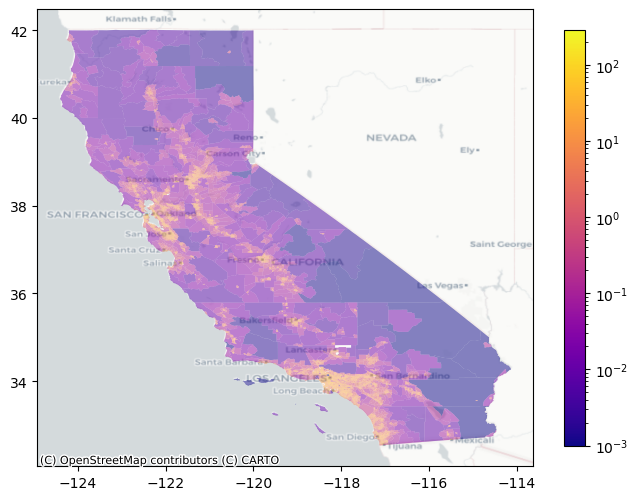

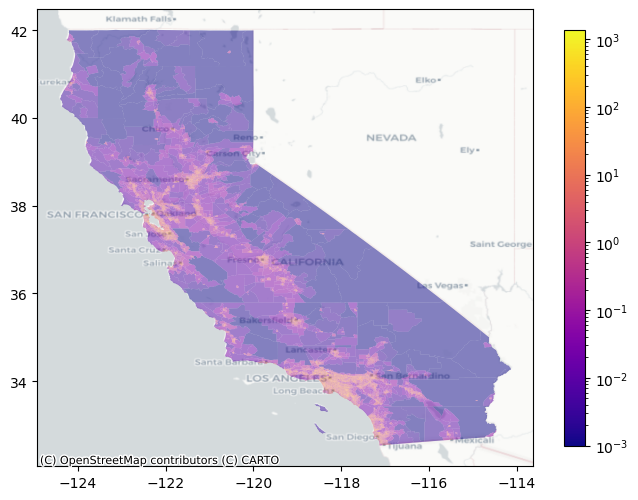

In [22]:
import matplotlib
ax = example_map.plot(figsize = (8,6), column = 'pop_per_acre', 
                            alpha = 0.5, legend=True,
                            norm=matplotlib.colors.LogNorm(0.001, 
                                                           vmax=example_map.pop_per_acre.max()),
                            cmap= 'plasma',
                            linewidth=0.01, 
                            legend_kwds = {'shrink': 0.9})
cx.add_basemap(ax, crs = 'EPSG:4269',source = cx.providers.CartoDB.Positron)
plt.savefig('Plot/CA_pop_density.png', dpi = 300, bbox_inches = 'tight')

ax = example_map.plot(figsize = (8,6), column = 'jobs_per_acre', 
                            alpha = 0.5, legend=True,
                            norm=matplotlib.colors.LogNorm(0.001, 
                                                           vmax=example_map.jobs_per_acre.max()),
                            cmap= 'plasma',
                            linewidth=0.01,  
                            legend_kwds = {'shrink': 0.9})
cx.add_basemap(ax, crs = 'EPSG:4269',source = cx.providers.CartoDB.Positron)
plt.savefig('Plot/CA_job_density.png', dpi = 300, bbox_inches = 'tight')

In [5]:
# microtype crosswalk
# census_tract_crosswalk.head(5)
census_tract_crosswalk_short = \
census_tract_crosswalk[['GEOID_TRACT_20', 'GEOID_TRACT_10']]
# v1_cluster.head(5)
v1_cluster_short = v1_cluster[['GEOID', 'microtype', 'geotype', 'st_code']]
v1_cluster_short = v1_cluster_short.rename(columns = {'GEOID': 'GEOID_TRACT_10'})
v1_cluster_to_2020 = pd.merge(census_tract_crosswalk_short,
                             v1_cluster_short, on = 'GEOID_TRACT_10',
                             how = 'left')
v1_cluster_to_2020 = v1_cluster_to_2020.rename(columns = {'GEOID_TRACT_20': 'GEOID'})
v1_cluster_to_2020.head(5)

,GEOID,GEOID_TRACT_10,microtype,geotype,st_code
0,1001020100,1001020100,2.0,F,AL
1,1001020100,1001020200,2.0,F,AL
2,1001020200,1001020200,2.0,F,AL
3,1001020300,1001020300,5.0,F,AL
4,1001020400,1001020400,5.0,F,AL


In [7]:
cluster_order = {'Urban_industrial':4, 
                 'Rural_agriculture': 1, 
                 'Suburban': 3, 
                 'Urban_center': 5, 
                 'Rural_towncenter': 2}
cluster_results_compare = pd.merge(cluster_results_to_plot,
                                   v1_cluster_to_2020,
                                   left_index = True,
                                   right_on = 'GEOID',
                                   how = 'left')


cluster_results_compare.head(5)

,pop_per_acre,jobs_per_acre,jobs_resident_bal,job_diversity,jobs_dist_bin1,jobs_dist_bin2,jobs_dist_bin3,jobs_dist_bin4,remote jobs,job_sink_mag,impervious_developed,developed_open_space,census_urban_area,demand_microtype_comb,GEOID,GEOID_TRACT_10,microtype,geotype,st_code,ranking
104588,0.007571,0.000743,0.098095,0.634874,0.0,0.0,0.000000,0.960432,0.039568,0.224194,0.000577,0.001717,0,Rural_agriculture,48077030302,48077030301,6.0,B,TX,1
91730,0.005966,0.000408,0.068444,0.477483,0.0,0.0,0.389474,0.557895,0.052632,0.173358,0.004960,0.019291,0,Rural_agriculture,40149965400,40075963600,6.0,E,OK,1
91731,0.005966,0.000408,0.068444,0.477483,0.0,0.0,0.389474,0.557895,0.052632,0.173358,0.004960,0.019291,0,Rural_agriculture,40149965400,40149965400,6.0,E,OK,1
4202,0.004489,0.000061,0.013533,0.266797,0.0,0.0,0.000000,0.945946,0.054054,0.082774,0.003070,0.024559,0,Rural_agriculture,4017942400,4017942300,6.0,C,AZ,1
4203,0.004489,0.000061,0.013533,0.266797,0.0,0.0,0.000000,0.945946,0.054054,0.082774,0.003070,0.024559,0,Rural_agriculture,4017942400,4017942400,6.0,C,AZ,1


<Axes: xlabel='demand_microtype_comb'>

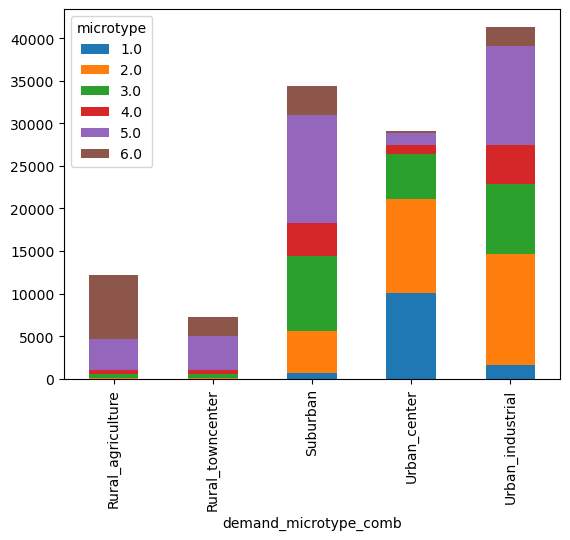

In [8]:
microtype_compare = pd.crosstab(cluster_results_compare.demand_microtype_comb, 
                                cluster_results_compare.microtype)
microtype_compare.plot(kind = 'bar', stacked = True)

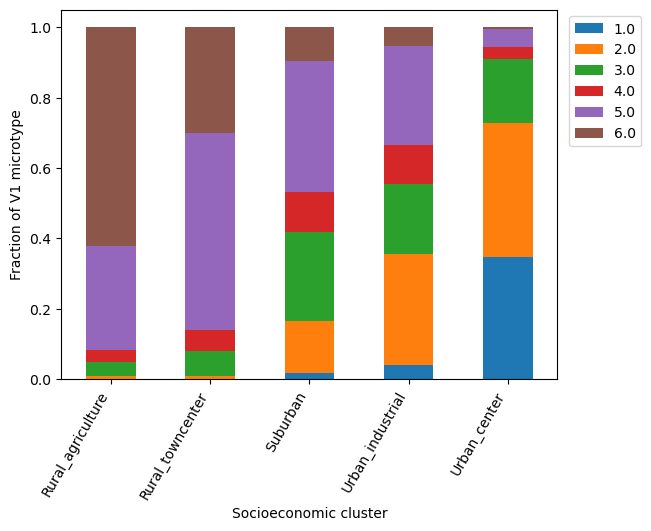

microtype,1.0,2.0,3.0,4.0,5.0,6.0
demand_microtype_comb,,,,,,
Rural_agriculture,0.000327,0.007527,0.041483,0.032401,0.295533,0.622730
Rural_towncenter,0.000276,0.007303,0.073033,0.060218,0.557255,0.301915
Suburban,0.017851,0.146772,0.253764,0.112962,0.372579,0.096072
Urban_industrial,0.039995,0.314956,0.199395,0.110507,0.280353,0.054794
Urban_center,0.347445,0.380210,0.182963,0.034245,0.048976,0.006161


In [10]:
microtype_compare_frac = microtype_compare.div(microtype_compare.sum(axis=1), axis=0)
microtype_compare_frac = microtype_compare_frac.reset_index()
microtype_compare_frac.loc[:, 'ranking'] = \
microtype_compare_frac.loc[:, 'demand_microtype_comb'].map(cluster_order)
microtype_compare_frac = \
microtype_compare_frac.sort_values(by = 'ranking', ascending = True)
microtype_compare_frac = microtype_compare_frac.drop(columns = 'ranking')
microtype_compare_frac = microtype_compare_frac.set_index('demand_microtype_comb')
# Create the plot
microtype_compare_frac.plot.bar(stacked=True)
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel('Socioeconomic cluster')
plt.ylabel('Fraction of V1 microtype')
plt.legend(bbox_to_anchor = (1.01, 1))
plt.savefig('Plot/microtype_comparison.png', dpi = 300, bbox_inches = 'tight')
plt.show()
microtype_compare_frac

In [6]:
cluster_results.demand_microtype_comb.unique()

array(['Urban_industrial', 'Rural_agriculture', 'Suburban',
       'Urban_center', 'Rural_towncenter'], dtype=object)